```pip install pandas numpy scikit-learn matplotlib seaborn```

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


In [44]:
file_path = 'DataLab5/report.csv'
df = pd.read_csv(file_path)

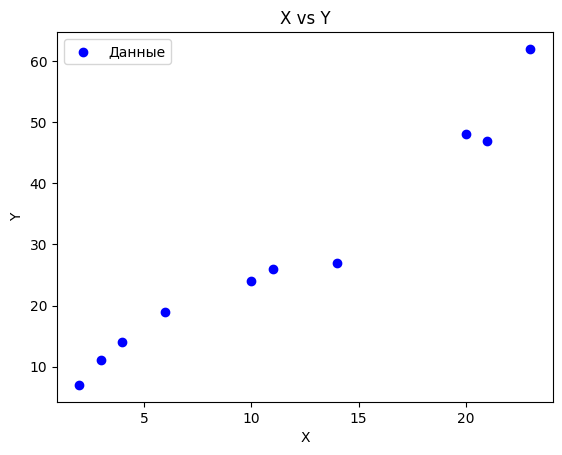

In [45]:
# Визуализация данных
plt.scatter(df['X'], df['Y'], color='blue', label='Данные')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



In [46]:
# Разделение на признаки и целевую переменную
X = df[['X']].values
y = df['Y'].values

# Определение моделей
models = []

# Линейная регрессия
models.append(('Линейная регрессия', LinearRegression()))


In [47]:

# Полиномиальная регрессия
for degree in [2, 3]:
    models.append((f'Полиномиальная регрессия (степень={degree})', Pipeline([('poly', PolynomialFeatures(degree=degree)), ('linear', LinearRegression())])))

# SVR с разными ядрами
for kernel in ['linear', 'rbf', 'poly']:
    models.append((f'SVR (ядро={kernel})', SVR(kernel=kernel)))

# Деревья решений
for max_depth in [None, 2, 3, 4]:
    models.append((f'Дерево решений (max_depth={max_depth})', DecisionTreeRegressor(max_depth=max_depth)))


In [48]:

# Кросс-валидация и оценка моделей
results = []
names = []

for name, model in models:
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-cv_scores)
    results.append(rmse_scores)
    names.append(name)
    msg = f"{name}: среднее RMSE={rmse_scores.mean():.3f}, std={rmse_scores.std():.3f}"
    print(msg)


Линейная регрессия: среднее RMSE=4.165, std=2.535
Полиномиальная регрессия (степень=2): среднее RMSE=3.954, std=1.178
Полиномиальная регрессия (степень=3): среднее RMSE=2.686, std=2.995
SVR (ядро=linear): среднее RMSE=4.184, std=2.771
SVR (ядро=rbf): среднее RMSE=15.603, std=8.975
SVR (ядро=poly): среднее RMSE=4.480, std=1.780
Дерево решений (max_depth=None): среднее RMSE=4.233, std=3.063
Дерево решений (max_depth=2): среднее RMSE=5.566, std=2.465
Дерево решений (max_depth=3): среднее RMSE=4.587, std=2.866
Дерево решений (max_depth=4): среднее RMSE=4.233, std=3.063


C:\Users\User\AppData\Local\Temp\ipykernel_35192\3539246264.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, patch_artist=True)


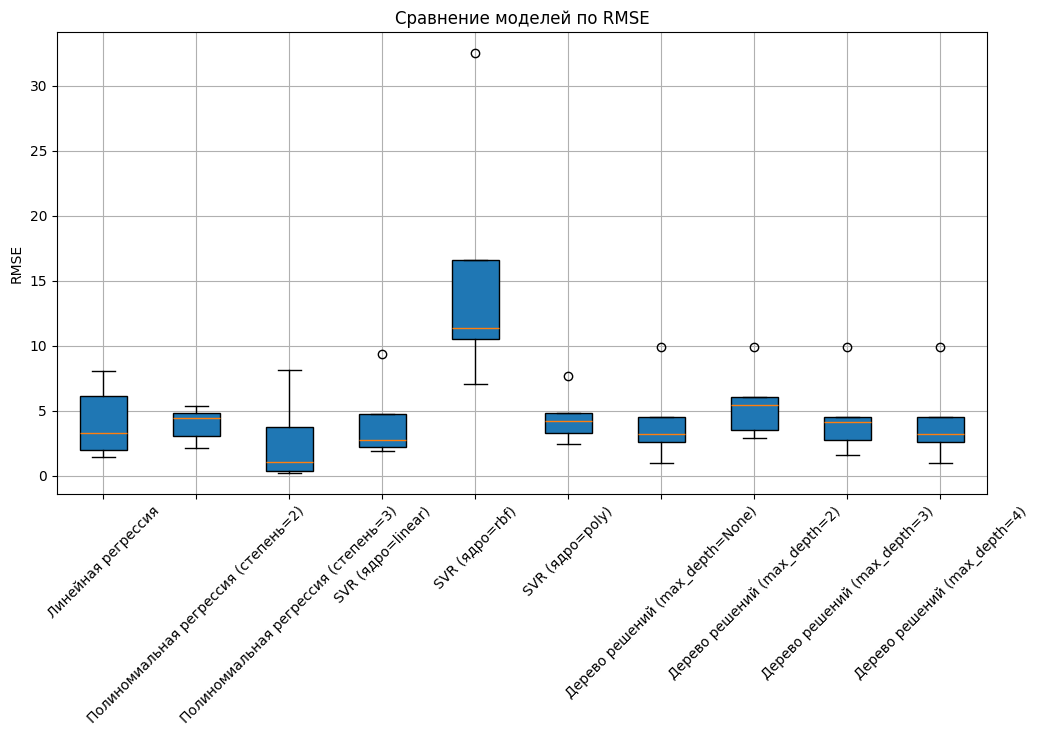

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [49]:

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.boxplot(results, labels=names, patch_artist=True)
plt.xticks(rotation=45)
plt.title('Сравнение моделей по RMSE')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Выбор лучшей модели
best_model = None
best_score = float('inf')

for name, model in models:
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-cv_scores).mean()
    if rmse < best_score:
        best_score = rmse
        best_model = model

# Обучение лучшей модели
best_model.fit(X, y)
